In [1]:
import joypy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly_express as px
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns
import missingno as msno
from datetime import datetime
from matplotlib import cm
from sklearn.feature_selection import SelectKBest, chi2
from feature_engine.missing_data_imputers import RandomSampleImputer

In [2]:
filename='KNMI.txt'
df = pd.read_csv(filename,error_bad_lines=False,header=0)
print('--->dimension of dataset')
print(df.shape)
print('--------------------------------------------------------------------------')
print('--->Preview the dataset')

print(df.sample(5))
print('--------------------------------------------------------------------------')
print('--->View summary of dataset')

df.info()
print('--------------------------------------------------------------------------')
print('--->View column names') 
df.columns

C:\Users\Gebruiker\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (0,2,3,4,5,6,7,8,11,12,13,14,15,16,18,19,20,21,22,23,25,26,28,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.



--->dimension of dataset
(831845, 41)
--------------------------------------------------------------------------
--->Preview the dataset
        # STN    YYYYMMDD  DDVEC  FHVEC     FG    FHX   FHXH    FHN   FHNH  \
653967    344  19740424.0    354     57     62     93     15     26      6   
747342    375  19550222.0     72     57     57     77      1     36      7   
42558     225  19960715.0     10     62     65    100     16     20      1   
11971     210  19640323.0    286     10     10     41     15      0      1   
436267    290  19720827.0     64     26     26     41     22     15      3   

          FXX  ...   VVNH    VVX   VVXH     NG     UG     UX    UXH     UN  \
653967    129  ...      6     80      8      3     89    100     24     76   
747342         ...     10     58      3      3                               
42558     120  ...      1     84      6      3                               
11971          ...      3     40     12      8                               
4362

Index(['# STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24'],
      dtype='object')

In [3]:
#The non-numerical columns names:
del df['# STN']
#df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
#df['YYYYMMDD'].dt.year
df.rename(columns = {'YYYYMMDD':'Date'}, inplace = True)  
df.columns=df.columns.str.replace(' ','')
df.drop([0],inplace=True)
#df.set_index("Date", inplace=True)
numerical_columns=df.select_dtypes(exclude =[np.number]).columns

In [4]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [5]:
df[df['Year']==1990].count()

Date     11677
DDVEC    11677
FHVEC    11677
FG       11677
FHX      11677
FHXH     11677
FHN      11677
FHNH     11677
FXX      11677
FXXH     11677
TG       11677
TN       11677
TNH      11677
TX       11677
TXH      11677
T10N     11677
T10NH    11677
SQ       11677
SP       11677
Q        11677
DR       11677
RH       11677
RHX      11677
RHXH     11677
PG       11677
PX       11677
PXH      11677
PN       11677
PNH      11677
VVN      11677
VVNH     11677
VVX      11677
VVXH     11677
NG       11677
UG       11677
UX       11677
UXH      11677
UN       11677
UNH      11677
EV24     11677
Year     11677
Month    11677
Day      11677
dtype: int64

In [6]:
df.drop(columns=['Date'],inplace=True)

In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O']
for t in categorical:
    df[t] = pd.to_numeric(df[t],errors='coerce')

In [8]:
df['TX']=df['TX']/10
df['TG']=df['TG']/10
df['SQ']=df['SQ']/10

In [10]:
df['TX'].skew(),df['TG'].skew(),df['SQ'].skew()

(0.018118636218684273, -0.19935319066481358, 0.6615603852827485)

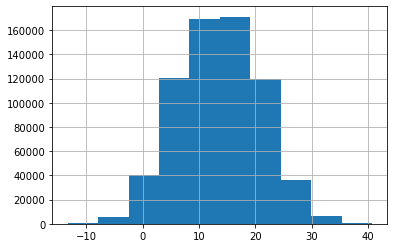

In [525]:
df['TX'].hist(),df['TG'].skew(),df['SQ'].skew()

In [557]:
df['Year'].min()

1900

In [558]:
# detecting outliers

# Age
Upper_boundary = df.TX.mean() + 3* df.TX.std()
Lower_boundary = df.TX.mean() - 3* df.TX.std()
print('TX outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

TX outliers are values < -8.061218076076678 or > 35.357121930393426


In [559]:
df['TX'].describe()

count    669068.000000
mean         13.647952
std           7.236390
min         -13.300000
25%           8.300000
50%          13.600000
75%          19.000000
max          40.700000
Name: TX, dtype: float64

In [560]:
df.loc[df.TX>28, 'TG'] = 35
df.loc[df.TX<-8, 'TG'] = -8

In [561]:
# detecting outliers

Upper_boundary = df.TG.mean() + 3* df.TG.std()
Lower_boundary = df.TG.mean() - 3* df.TG.std()
print('TG outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

TG outliers are values < -10.726421809953639 or > 31.09454713473755


In [562]:
df['TG'].describe()

count    671599.000000
mean         10.184063
std           6.970161
min         -15.200000
25%           5.500000
50%          10.000000
75%          14.900000
max          35.000000
Name: TG, dtype: float64

In [563]:
df.loc[df.TG>28, 'TG'] = 28
df.loc[df.TG<-8, 'TG'] = -8

In [564]:
#detecting outliers 
IQR = df.SQ.quantile(0.75) - df.SQ.quantile(0.25)
Lower_fence = df.SQ.quantile(0.25) - (IQR * 3)
Upper_fence = df.SQ.quantile(0.75) + (IQR * 3)
print('SQ outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

SQ outliers are values < -20.1 or > 28.200000000000003


In [565]:
df['SQ'].describe()

count    567422.000000
mean          4.533295
std           4.126782
min          -0.100000
25%           0.600000
50%           3.700000
75%           7.500000
max          16.700000
Name: SQ, dtype: float64

In [566]:
df['Month'].max()

12

Text(0, 0.5, 'TG')

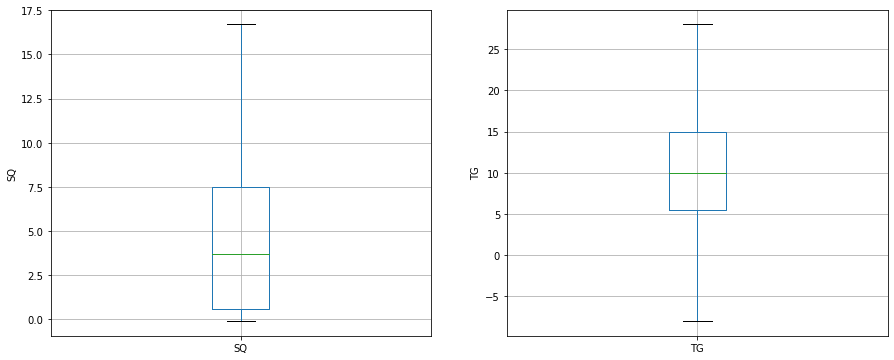

In [502]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.boxplot(column='SQ')
fig.set_title('')
fig.set_ylabel('SQ')

plt.subplot(1, 2, 2)
fig = df.boxplot(column='TG')
fig.set_title('')
fig.set_ylabel('TG')

In [536]:
df['TG'].kurtosis(),df['SQ'].kurtosis(),df['TX'].kurtosis()

(0.02978261061646137, -0.615991343451538, -0.4294051724851311)

In [537]:
#df.Day = df.Day.astype(int)
#df.Month = df.Day.astype(int)
#df.Year=df.Year.astype(int)

In [538]:
df.head()

,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,...,NG,UG,UX,UXH,UN,UNH,EV24,Year,Month,Day
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,30
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,31
3,236.0,13.0,24.0,50.0,8.0,10.0,1.0,90.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2,1
4,150.0,46.0,58.0,80.0,9.0,10.0,3.0,100.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2,2
5,106.0,65.0,66.0,90.0,8.0,50.0,1.0,120.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2,3


In [567]:
imputer = RandomSampleImputer(random_state = 29)

# fit the imputer to the train set
imputer.fit(df)

# transform the data
idf = imputer.transform(df)

In [540]:
mdf=df.copy()        
#for t in categorical:
for t in mdf.columns:
    col_median=mdf[t].median()
    mdf[t]=mdf[t].fillna(col_median)

In [569]:
idf.head()

,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,...,NG,UG,UX,UXH,UN,UNH,EV24,Year,Month,Day
1,256.0,62.0,59.0,60.0,16.0,20.0,2.0,31.0,7.0,16.1,...,4.0,77.0,98.0,6.0,53.0,11.0,17.0,2000,1,30
2,170.0,62.0,10.0,113.0,24.0,57.0,7.0,123.0,1.0,14.1,...,7.0,88.0,99.0,17.0,52.0,11.0,11.0,2000,1,31
3,236.0,13.0,24.0,50.0,8.0,10.0,1.0,90.0,20.0,3.1,...,4.0,81.0,99.0,3.0,59.0,16.0,18.0,2000,2,1
4,150.0,46.0,58.0,80.0,9.0,10.0,3.0,100.0,9.0,16.0,...,5.0,70.0,98.0,2.0,52.0,14.0,3.0,2000,2,2
5,106.0,65.0,66.0,90.0,8.0,50.0,1.0,120.0,8.0,9.2,...,6.0,94.0,97.0,5.0,85.0,21.0,6.0,2000,2,3


In [450]:
cor=mdf.corr()
#f , ax = plt.subplots(figsize = (14,12))
#plt.title('Correlation of Features- HeatMap',y=1,size=16)
#sns.heatmap(cor,square = True,  vmax=0.8)
cor_target = abs(cor["SQ"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
print('the most relevant features are')
relevant_features

the most relevant features are


TG      0.378291
TX      0.475093
SQ      1.000000
SP      0.936841
Q       0.706305
NG      0.401875
UG      0.532810
UN      0.570755
EV24    0.691001
Name: SQ, dtype: float64

In [570]:
idf.rename(columns = {'TX':'Maximum temperature','SQ':'Sunshine duration','TG':'24-hour average temperature' }, inplace = True)  

In [571]:
idf=idf[['Maximum temperature','Sunshine duration','24-hour average temperature','Year','Month','Day']]

In [572]:
idf.head()

,Maximum temperature,Sunshine duration,24-hour average temperature,Year,Month,Day
1,8.1,-0.1,16.1,2000,1,30
2,10.2,1.0,14.1,2000,1,31
3,13.5,1.2,3.1,2000,2,1
4,12.3,0.6,16.0,2000,2,2
5,9.4,8.9,9.2,2000,2,3


In [573]:
idf.to_csv('TSQdata.csv')